## STOCK MARKET API PROJECT 

Collect stock data for any given company using RapidAPI
1. Create an account on RapidAPI - https://rapidapi.com/auth/sign-up
2. Alpha Vantage API - https://rapidapi.com/alphavantage/api/alpha-vantage

Install required package

In [1]:
%pip install python-dotenv requests

Note: you may need to restart the kernel to use updated packages.


In [1]:
# LOAD API KEY FORN .env FILE
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import os
api_key = os.getenv("API_KEY")

SYMBOL SEARCH FUNCTIONALITY

In [4]:
import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"datatype":"json","keywords":"State Bank of India","function":"SYMBOL_SEARCH"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data = response.json()

data

{'bestMatches': [{'1. symbol': 'SBIN.BSE',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'India/Bombay',
   '5. marketOpen': '09:15',
   '6. marketClose': '15:30',
   '7. timezone': 'UTC+5.5',
   '8. currency': 'INR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBKFF',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SID.FRK',
   '2. name': 'State Bank of India',
   '3. type': 'Equity',
   '4. region': 'Frankfurt',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency': 'EUR',
   '9. matchScore': '1.0000'},
  {'1. symbol': 'SBID.LON',
   '2. name': 'State Bank of India GDR',
   '3. type': 'Equity',
   '4. region': 'United Kingdom',
   '5. marketOpen': '08:00',
   '6. marketClose': '16:30',
   '7. timez

In [5]:
type(data)

dict

In [6]:
symbols = data["bestMatches"]
symbols

[{'1. symbol': 'SBIN.BSE',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'India/Bombay',
  '5. marketOpen': '09:15',
  '6. marketClose': '15:30',
  '7. timezone': 'UTC+5.5',
  '8. currency': 'INR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBKFF',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'United States',
  '5. marketOpen': '09:30',
  '6. marketClose': '16:00',
  '7. timezone': 'UTC-04',
  '8. currency': 'USD',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SID.FRK',
  '2. name': 'State Bank of India',
  '3. type': 'Equity',
  '4. region': 'Frankfurt',
  '5. marketOpen': '08:00',
  '6. marketClose': '20:00',
  '7. timezone': 'UTC+02',
  '8. currency': 'EUR',
  '9. matchScore': '1.0000'},
 {'1. symbol': 'SBID.LON',
  '2. name': 'State Bank of India GDR',
  '3. type': 'Equity',
  '4. region': 'United Kingdom',
  '5. marketOpen': '08:00',
  '6. marketClose': '16:30',
  '7. timezone': 'UTC+01',
  '8. currency': 'USD',
  '9. mat

In [8]:
symbol_new = {}
for i in symbols:
    s = i["1. symbol"]
    symbol_new[s] = [i["2. name"], i["4. region"], i["8. currency"]]

In [9]:
symbol_new

{'SBIN.BSE': ['State Bank of India', 'India/Bombay', 'INR'],
 'SBKFF': ['State Bank of India', 'United States', 'USD'],
 'SID.FRK': ['State Bank of India', 'Frankfurt', 'EUR'],
 'SBID.LON': ['State Bank of India GDR', 'United Kingdom', 'USD']}

In [10]:
#FROM ABOVE SYMBOLS I WANT TO GET DETAILS FOR SBIN.BSE

import requests

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {"function":"TIME_SERIES_DAILY","symbol":"SBIN.BSE","outputsize":"compact","datatype":"json"}

headers = {
	"x-rapidapi-key": api_key,
	"x-rapidapi-host": "alpha-vantage.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

data2 = response.json()

data2

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'SBIN.BSE',
  '3. Last Refreshed': '2025-04-17',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2025-04-17': {'1. open': '771.1000',
   '2. high': '801.0000',
   '3. low': '767.2500',
   '4. close': '797.1000',
   '5. volume': '738676'},
  '2025-04-16': {'1. open': '764.0000',
   '2. high': '774.5500',
   '3. low': '760.4000',
   '4. close': '771.7500',
   '5. volume': '477621'},
  '2025-04-15': {'1. open': '768.0500',
   '2. high': '770.6000',
   '3. low': '757.6500',
   '4. close': '763.3000',
   '5. volume': '763643'},
  '2025-04-11': {'1. open': '759.9500',
   '2. high': '759.9500',
   '3. low': '746.1500',
   '4. close': '754.0500',
   '5. volume': '593599'},
  '2025-04-09': {'1. open': '768.8000',
   '2. high': '769.0000',
   '3. low': '740.7500',
   '4. close': '742.0500',
   '5. volume': '467660'},
  '2025-04-08': {'1. open': '757.0000'

In [11]:
data2.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [12]:
prices = data2["Time Series (Daily)"]

In [13]:
import pandas as pd
df = pd.DataFrame(prices).T
df

,1. open,2. high,3. low,4. close,5. volume
2025-04-17,771.1000,801.0000,767.2500,797.1000,738676
2025-04-16,764.0000,774.5500,760.4000,771.7500,477621
2025-04-15,768.0500,770.6000,757.6500,763.3000,763643
2025-04-11,759.9500,759.9500,746.1500,754.0500,593599
2025-04-09,768.8000,769.0000,740.7500,742.0500,467660
...,...,...,...,...,...
2024-11-27,839.3000,842.1500,832.0000,834.2000,502957
2024-11-26,844.7500,846.7000,835.2000,839.3500,448647
2024-11-25,826.2500,849.3000,825.9500,844.7500,1612713
2024-11-22,785.6500,819.7500,784.3000,816.0500,1534393


In [14]:
df.dtypes

1. open      object
2. high      object
3. low       object
4. close     object
5. volume    object
dtype: object

In [15]:
# CONVERT ALL DATA TO FLOAT
df = df.astype(float)
df.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [16]:
# INDEX NOT IN DATA FORMAT
df.index

Index(['2025-04-17', '2025-04-16', '2025-04-15', '2025-04-11', '2025-04-09',
       '2025-04-08', '2025-04-07', '2025-04-04', '2025-04-03', '2025-04-02',
       '2025-04-01', '2025-03-28', '2025-03-27', '2025-03-26', '2025-03-25',
       '2025-03-24', '2025-03-21', '2025-03-20', '2025-03-19', '2025-03-18',
       '2025-03-17', '2025-03-13', '2025-03-12', '2025-03-11', '2025-03-10',
       '2025-03-07', '2025-03-06', '2025-03-05', '2025-03-04', '2025-03-03',
       '2025-02-28', '2025-02-27', '2025-02-25', '2025-02-24', '2025-02-21',
       '2025-02-20', '2025-02-19', '2025-02-18', '2025-02-17', '2025-02-14',
       '2025-02-13', '2025-02-12', '2025-02-11', '2025-02-10', '2025-02-07',
       '2025-02-06', '2025-02-05', '2025-02-04', '2025-02-03', '2025-01-31',
       '2025-01-30', '2025-01-29', '2025-01-28', '2025-01-27', '2025-01-24',
       '2025-01-23', '2025-01-22', '2025-01-21', '2025-01-20', '2025-01-17',
       '2025-01-16', '2025-01-15', '2025-01-14', '2025-01-13', '2025-01-10',

In [17]:
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2025-04-17', '2025-04-16', '2025-04-15', '2025-04-11',
               '2025-04-09', '2025-04-08', '2025-04-07', '2025-04-04',
               '2025-04-03', '2025-04-02', '2025-04-01', '2025-03-28',
               '2025-03-27', '2025-03-26', '2025-03-25', '2025-03-24',
               '2025-03-21', '2025-03-20', '2025-03-19', '2025-03-18',
               '2025-03-17', '2025-03-13', '2025-03-12', '2025-03-11',
               '2025-03-10', '2025-03-07', '2025-03-06', '2025-03-05',
               '2025-03-04', '2025-03-03', '2025-02-28', '2025-02-27',
               '2025-02-25', '2025-02-24', '2025-02-21', '2025-02-20',
               '2025-02-19', '2025-02-18', '2025-02-17', '2025-02-14',
               '2025-02-13', '2025-02-12', '2025-02-11', '2025-02-10',
               '2025-02-07', '2025-02-06', '2025-02-05', '2025-02-04',
               '2025-02-03', '2025-01-31', '2025-01-30', '2025-01-29',
               '2025-01-28', '2025-01-27', '2025-01-24', '2025-01-23',
      

In [18]:
df.index.name = "Date"

In [19]:
df

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-04-17,771.10,801.00,767.25,797.10,738676.0
2025-04-16,764.00,774.55,760.40,771.75,477621.0
2025-04-15,768.05,770.60,757.65,763.30,763643.0
2025-04-11,759.95,759.95,746.15,754.05,593599.0
2025-04-09,768.80,769.00,740.75,742.05,467660.0
...,...,...,...,...,...
2024-11-27,839.30,842.15,832.00,834.20,502957.0
2024-11-26,844.75,846.70,835.20,839.35,448647.0
2024-11-25,826.25,849.30,825.95,844.75,1612713.0


In [20]:
df.to_csv("SBIN.csv")

In [21]:
# VISUALIZE CANDLESTICK CHART
%pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.


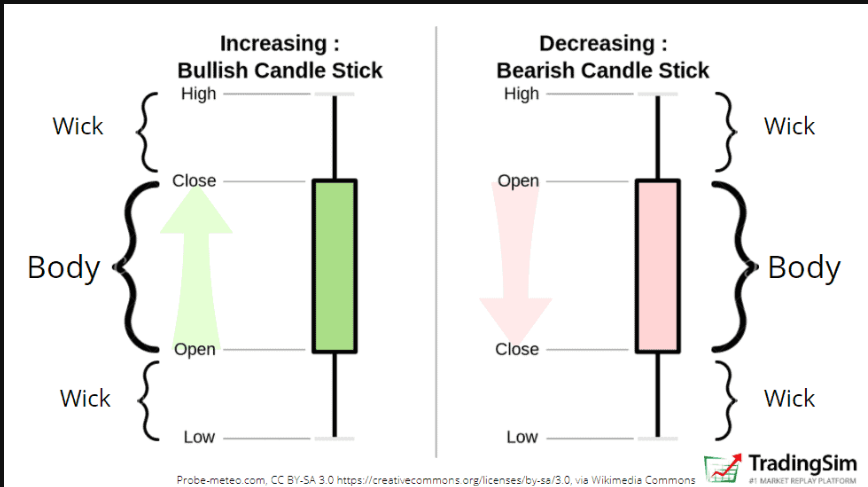

In [22]:
import plotly.graph_objects as go

In [27]:
fig = go.Figure(data =[
    go.Candlestick(
        x = df.index,
        open = df["1. open"],
        high = df["2. high"],
        low = df["3. low"],
        close = df["4. close"]
    )
])

fig.update_layout(width = 1200, height = 800)

fig.show()

In [28]:
type(fig)

plotly.graph_objs._figure.Figure

In [29]:
#  CREATE A CLASS TO GET DATA FOR ANT STOCK

In [31]:
from dotenv import load_dotenv
import os
import pandas as pd
import requests
import plotly.graph_objects as go

In [32]:
class StockAPI:

    def __init__(self):
        # Load the api key
        load_dotenv()
        self.api_key = os.getenv("API_KEY")
        # Get the url
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        # Show the headers
        self.headers = {
            "x-rapidapi-key": self.api_key,
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
        }

    def symbol_search(self, company: str) -> dict:
        querystring = {
            "datatype": "json",
            "keywords": company,
            "function": "SYMBOL_SEARCH",
        }
        response = requests.get(self.url, headers=self.headers, params=querystring)
        data = response.json()["bestMatches"]
        symbols = {}
        for i in data:
            s = i["1. symbol"]
            symbols[s] = [i["2. name"], i["4. region"], i["8. currency"]]
        # Return the symbols dictionary
        return symbols

    def get_daily_data(self, symbol: str) -> pd.DataFrame:
        querystring = {
            "function": "TIME_SERIES_DAILY",
            "symbol": symbol,
            "outputsize": "compact",
            "datatype": "json",
        }
        response = requests.get(self.url, headers= self.headers, params=querystring)
        data = response.json()["Time Series (Daily)"]
        # Convert into dataframe
        df = pd.DataFrame(data).T
        # Convert datatypes to float
        df = df.astype(float)
        # Convert index to datetime
        df.index = pd.to_datetime(df.index)
        # Provide a name to index
        df.index.name = "Date"
        return df
    
    def candlestick_chart(self, df: pd.DataFrame) -> go.Figure:
        fig = go.Figure(data = [
            go.Candlestick(
                x = df.index,
                open= df["1. open"],
                high= df["2. high"],
                low = df["3. low"],
                close= df["4. close"]
            )
        ])
        fig.update_layout(width = 1200, height = 800)
        return fig

In [33]:
# GET THE DETAILS FOR TESLA COMPANY STOCK
client = StockAPI()

In [34]:
client.symbol_search("Tesla")

{'TSLA': ['Tesla Inc', 'United States', 'USD'],
 'TL0.DEX': ['Tesla Inc', 'XETRA', 'EUR'],
 'TL0.FRK': ['Tesla Inc', 'Frankfurt', 'EUR'],
 'TSLA34.SAO': ['Tesla Inc', 'Brazil/Sao Paolo', 'BRL'],
 'TSLA.TRT': ['Tesla CDR (CAD Hedged)', 'Toronto', 'CAD'],
 'TL01.FRK': ['TESLA INC. CDR DL-001', 'Frankfurt', 'EUR']}

In [36]:
df2 = client.get_daily_data("TSLA")
df2

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-04-17,243.470,244.3400,237.6833,241.37,83404775.0
2025-04-16,247.610,251.9700,233.8900,241.55,112378737.0
2025-04-15,249.910,258.7500,247.5400,254.11,79594318.0
2025-04-14,258.360,261.8000,245.9300,252.35,100135241.0
2025-04-11,251.840,257.7400,241.3629,252.31,128948085.0
...,...,...,...,...,...
2024-11-27,341.800,342.5500,326.5900,332.89,57896439.0
2024-11-26,341.000,346.9600,335.6600,338.23,62295857.0
2024-11-25,360.140,361.9300,338.2000,338.59,95890899.0


In [37]:
df2.to_csv("Tesla.csv")

In [38]:
fig2 = client.candlestick_chart(df2)
fig2.show()

In [39]:
# GET DETAIL FOR HDFC BANK INDIA 
client.symbol_search("HDFC Bank")

{'HDB': ['HDFC Bank Ltd', 'United States', 'USD'],
 'HDFCBANK.BSE': ['HDFC Bank Limited', 'India/Bombay', 'INR'],
 'H1DB34.SAO': ['HDFC Bank Limited', 'Brazil/Sao Paolo', 'BRL'],
 'HDFA.FRK': ['HDFC Bank Limited', 'Frankfurt', 'EUR']}

In [40]:
df3 = client.get_daily_data("HDFCBANK.BSE")
df3

,1. open,2. high,3. low,4. close,5. volume
Date,,,,,
2025-04-17,1879.05,1919.35,1877.75,1906.55,408716.0
2025-04-16,1882.00,1882.05,1861.00,1877.90,358007.0
2025-04-15,1870.15,1875.90,1854.45,1864.90,1027801.0
2025-04-11,1774.00,1818.95,1774.00,1806.60,344590.0
2025-04-09,1767.75,1773.40,1753.45,1765.50,280853.0
...,...,...,...,...,...
2024-11-28,1818.00,1836.05,1788.00,1792.90,215760.0
2024-11-27,1787.15,1817.20,1785.30,1811.00,220040.0
2024-11-26,1800.00,1804.10,1770.00,1785.40,223498.0


In [41]:
df3.to_csv("HDFC.csv")

In [42]:
fig3 = client.candlestick_chart(df3)
fig3.show()